In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\singhy\AppData\Local\Temp\ipykernel_12824\3635408121.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"
df = pd.read_excel(f"{data_dir}/sce-labor-microdata-public.xlsx", sheet_name="Data", skiprows = [0])

In [13]:
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

In [14]:
df2 = pd.read_excel(f"{data_dir}/frbny-sce-public-microdata-latest.xlsx", sheet_name="Data", skiprows = [0])

In [15]:
df2 

,date,userid,tenure,weight,Q1,Q1a,Q1apart2,Q2,Q3,Q4new,...,QRA1,QRA2,survey_date,date_dt,_AGE_CAT,_NUM_CAT,_REGION_CAT,_COMMUTING_ZONE,_EDU_CAT,_HH_INC_CAT
0,202001,70103231,12,0.818250,4.0,NaN,NaN,3.0,20.0,62.0,...,NaN,NaN,2020-01-23,2020-01-01,40 to 60,High,West,218.0,College,Over 100k
1,202001,70103252,11,2.879998,3.0,NaN,NaN,2.0,1.0,30.0,...,NaN,NaN,2020-01-02,2020-01-01,40 to 60,Low,Northeast,203.0,High School,Under 50k
2,202001,70103258,12,0.549674,4.0,NaN,NaN,4.0,0.0,3.0,...,NaN,NaN,2020-01-07,2020-01-01,Over 60,High,South,102.0,College,50k to 100k
3,202001,70103285,12,0.481746,4.0,NaN,NaN,4.0,10.0,10.0,...,NaN,NaN,2020-01-27,2020-01-01,Under 40,High,Midwest,100.0,College,50k to 100k
4,202001,70103342,11,0.481746,3.0,NaN,NaN,3.0,65.0,50.0,...,NaN,NaN,2020-01-21,2020-01-01,Under 40,High,Midwest,58.0,College,50k to 100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58949,202312,75016418,1,0.607803,2.0,NaN,NaN,3.0,15.0,60.0,...,5.0,5.0,2023-12-02,2023-12-01,40 to 60,High,West,5.0,College,Over 100k
58950,202312,75016420,1,0.553951,2.0,NaN,NaN,2.0,0.0,40.0,...,4.0,2.0,2023-12-01,2023-12-01,40 to 60,High,South,54.0,College,Over 100k
58951,202312,75016425,1,0.396640,3.0,NaN,NaN,3.0,10.0,50.0,...,2.0,2.0,2023-12-11,2023-12-01,Under 40,High,Northeast,431.0,College,Over 100k
58952,202312,75016427,1,1.435796,3.0,NaN,NaN,3.0,5.0,25.0,...,2.0,2.0,2023-12-05,2023-12-01,Over 60,High,West,290.0,Some College,Over 100k


In [ ]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m')

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m')

In [ ]:
final = pd.merge(df, df2, on = ['date', 'userid'])

In [ ]:
final.head

In [ ]:

final.to_excel(f"{output_dir}/data/test.xlsx", index=False)

# Dateime format 

select = ['userid', 'date','Q10_1', 'l1m', 'l1y', 'l3', 'js5', 'js6', 'js7', 'js9', 'nl1']
data = final[select]

data.rename(columns={
    'userid': 'user_id',
    'Q10_1': 'emp_stat', 
    'date': 'survey_date',
    'js5' : 'unemp_search', 
    'js6': 'emp_search',
    'js7': 'search_length',
    'js9': 'hours_search',
    'nl1': 'job_offers_rec'
}, inplace=True)

data

data['emp_stat'].describe()

In [3]:
# Dateime format 

df['date'] = pd.to_datetime(df['date'], format='%Y%m')

select = ['userid', 'date', 'l1m', 'l1y', 'l3', 'js5', 'js6', 'js7', 'js9', 'nl1']
data = df[select]

data.rename(columns={
    'userid': 'user_id',
    'date': 'survey_date',
    'js5' : 'unemp_search', 
    'js6': 'emp_search',
    'js7': 'search_length',
    'js9': 'hours_search',
    'nl1': 'job_offers_rec'
}, inplace=True)

C:\Users\singhy\AppData\Local\Temp\ipykernel_12824\295777182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


In [4]:
# Create emp_stat: 1 if l1y is not NaN, 0 if it is NaN
data['emp_stat'] = data['l1y'].notna().astype(int)


C:\Users\singhy\AppData\Local\Temp\ipykernel_12824\3584593358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emp_stat'] = data['l1y'].notna().astype(int)


In [5]:
keep = ['user_id', 'survey_date', 'unemp_search',
       'emp_search', 'search_length', 'hours_search', 'job_offers_rec',
       'emp_stat']
data = data[keep]
data = data[data['survey_date'] > '2015-11-01']

In [6]:
data['emp_search'] = np.where(data['emp_search'].isin([1, 2]), 1, 0)
data['unemp_search'] = np.where(data['unemp_search'].isin([1]), 1, 0)

data['search_status'] = np.where((data['emp_search'] == 1) | (data['unemp_search'] == 1), 1, 0)


In [7]:
data

,user_id,survey_date,unemp_search,emp_search,search_length,hours_search,job_offers_rec,emp_stat,search_status
6862,70057352,2016-03-01,0,0,NaN,NaN,1.0,1,0
6863,70057367,2016-03-01,0,0,NaN,NaN,0.0,0,0
6864,70057405,2016-03-01,0,0,NaN,NaN,0.0,1,0
6865,70057415,2016-03-01,0,0,NaN,NaN,0.0,0,0
6866,70057633,2016-03-01,0,0,NaN,NaN,0.0,1,0
...,...,...,...,...,...,...,...,...,...
30584,75009332,2022-11-01,0,0,NaN,NaN,1.0,1,0
30585,75009347,2022-11-01,0,0,NaN,NaN,0.0,1,0
30586,75009349,2022-11-01,0,0,NaN,NaN,0.0,0,0
30587,75009353,2022-11-01,0,0,NaN,NaN,1.0,0,0


In [8]:
# Count the number of employed (emp_stat == 1) per year
data['E'] = data.groupby('survey_date')['emp_stat'].transform(lambda x: (x == 1).sum())

# Count the number of unemployed (emp_stat == 0) per year
data['U'] = data.groupby('survey_date')['emp_stat'].transform(lambda x: (x == 0).sum())

# Labor Force 
data['L'] = data['E'] + data['U']

In [9]:
######################################################
# Extensive Margin Search 
######################################################

# Employed Workers searching for a job 
data['tot_emp_search'] = data.groupby('survey_date')['emp_search'].transform(lambda x: (x == 1).sum())

# Unemployed workers search for a job 

data['tot_unemp_search'] = data.groupby('survey_date')['unemp_search'].transform(lambda x: (x == 1).sum())

data['emp_search_share'] = data['tot_emp_search'] / (data['E'] + data['U'])

data['unemp_search_share'] = data['tot_unemp_search'] / (data['E'] + data['U'])

data['tot_search_share'] = data['emp_search_share'] + data['unemp_search_share']


In [11]:
data['share_unemp_search'] = data['tot_unemp_search'] / data['U']
data['share_emp_search'] = 

In [12]:
data

,user_id,survey_date,unemp_search,emp_search,search_length,hours_search,job_offers_rec,emp_stat,search_status,E,U,L,tot_emp_search,tot_unemp_search,emp_search_share,unemp_search_share,tot_search_share,share_unemp_search
6862,70057352,2016-03-01,0,0,NaN,NaN,1.0,1,0,754,332,1086,162,42,0.149171,0.038674,0.187845,0.126506
6863,70057367,2016-03-01,0,0,NaN,NaN,0.0,0,0,754,332,1086,162,42,0.149171,0.038674,0.187845,0.126506
6864,70057405,2016-03-01,0,0,NaN,NaN,0.0,1,0,754,332,1086,162,42,0.149171,0.038674,0.187845,0.126506
6865,70057415,2016-03-01,0,0,NaN,NaN,0.0,0,0,754,332,1086,162,42,0.149171,0.038674,0.187845,0.126506
6866,70057633,2016-03-01,0,0,NaN,NaN,0.0,1,0,754,332,1086,162,42,0.149171,0.038674,0.187845,0.126506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30584,75009332,2022-11-01,0,0,NaN,NaN,1.0,1,0,725,318,1043,134,31,0.128476,0.029722,0.158198,0.097484
30585,75009347,2022-11-01,0,0,NaN,NaN,0.0,1,0,725,318,1043,134,31,0.128476,0.029722,0.158198,0.097484
30586,75009349,2022-11-01,0,0,NaN,NaN,0.0,0,0,725,318,1043,134,31,0.128476,0.029722,0.158198,0.097484
30587,75009353,2022-11-01,0,0,NaN,NaN,1.0,0,0,725,318,1043,134,31,0.128476,0.029722,0.158198,0.097484


In [273]:
data = data[((data['hours_search'] <= 168) | (data['hours_search'].isna()))] 

In [274]:
data = data[(data['search_length'] < 200) | (data['hours_search'].isna())]

In [276]:
emp_workers = data[data['emp_search'] == 1]
unemp_workers = data[data['unemp_search'] == 1]

In [277]:
emp_workers = emp_workers[(emp_workers['hours_search'].isna()) | (emp_workers['hours_search'] <= 168)]
unemp_workers = unemp_workers[(unemp_workers['hours_search'].isna()) | (unemp_workers['hours_search'] <= 168)]

In [278]:
emp_workers['search_length'].describe()

count    3057.000000
mean       14.257017
std        22.075324
min         0.000000
25%         3.000000
50%         6.000000
75%        15.000000
max       195.000000
Name: search_length, dtype: float64

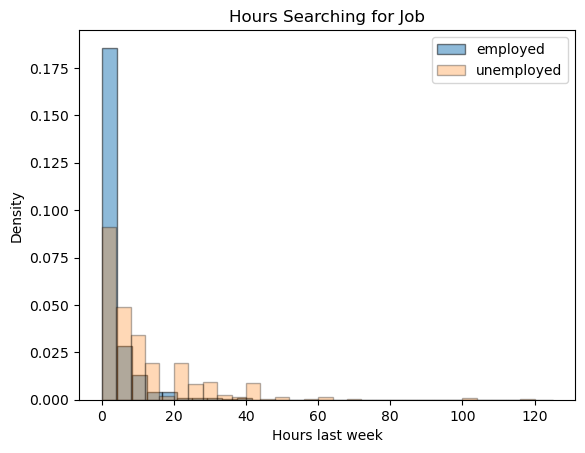

In [279]:
# Create a histogram for 'variable_name'
plt.hist(emp_workers['hours_search'], bins=30, alpha=0.5, label='employed', edgecolor='black', density=True)
plt.hist(unemp_workers['hours_search'], bins=30, alpha=0.3, label='unemployed', edgecolor='black', density=True)

# Add titles and labels
plt.title('Hours Searching for Job')
plt.xlabel('Hours last week')
plt.ylabel('Density')
plt.legend()
# Show the plot
plt.show()

In [280]:


################################################################
# Intensive Margin Search 
################################################################

# Search Hours supplied by employed workers 

data['emp_search_hours'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().sum()
)

# Search Hours supplied by unemployed workers 
data['unemp_search_hours'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().sum()
)

# Total hours of search 
data['tot_search_hours'] = data['emp_search_hours'] + data['unemp_search_hours'] 

# Share of hours supplied by employed workers 
data['emp_share_search_hours'] = data['emp_search_hours']  / data['tot_search_hours'] 

# Share of hours supplied by unemployed workers 
data['unemp_share_search_hours'] = data['unemp_search_hours'] / data['tot_search_hours'] 

# Average/st deviation hours of search conditional on employed and searching 

data['avg_search_hours_emp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().mean()
)

data['std_search_hours_emp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().std()
)

# Average hours of search conditional on unemployed and searching 
data['avg_search_hours_unemp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().mean()
)

data['std_search_hours_unemp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().std()
)


In [281]:
select = ['survey_date', 'E', 'U', 'L', 'tot_emp_search', 'tot_unemp_search',  'tot_search_share', 'emp_search_share', 'unemp_search_share', 'tot_search_hours', 
          'emp_share_search_hours', 'unemp_share_search_hours', 'avg_search_hours_emp', 'std_search_hours_emp', 
          'avg_search_hours_unemp', 'std_search_hours_unemp']

agg_data = data[select]

In [282]:
agg_data = agg_data.drop_duplicates().reset_index(drop=True)

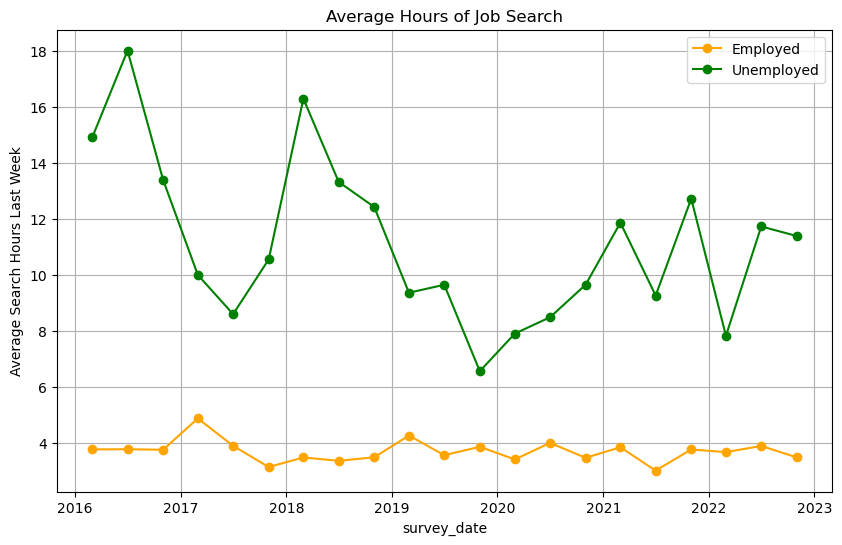

In [283]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot avg_search_hours_emp
plt.plot(agg_data['survey_date'], agg_data['avg_search_hours_emp'], label='Employed', marker='o', color = 'orange')

# Plot avg_search_hours_unemp
plt.plot(agg_data['survey_date'], agg_data['avg_search_hours_unemp'], label='Unemployed', marker='o', color = 'green')

# Add titles and labels
plt.title('Average Hours of Job Search')
plt.xlabel('survey_date')
plt.ylabel('Average Search Hours Last Week')
plt.legend()
plt.grid()

# Show the plot
plt.show()

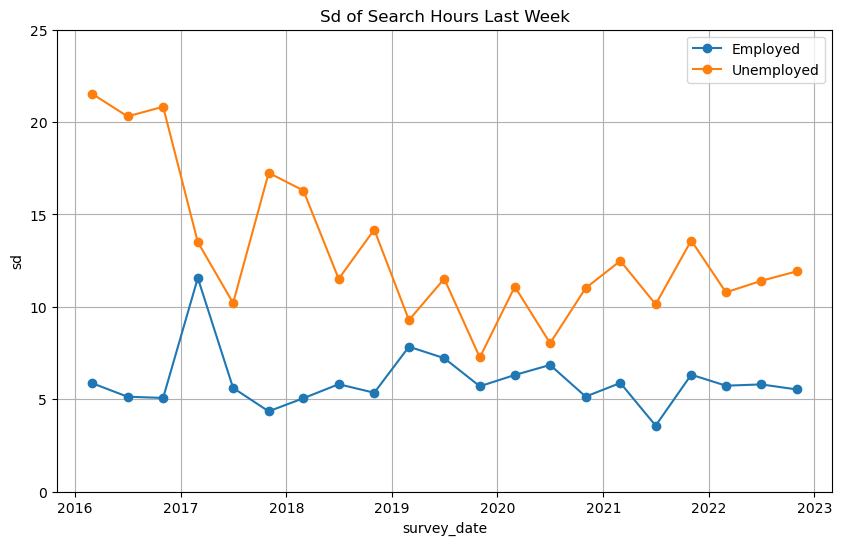

In [284]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot avg_search_hours_emp
plt.plot(agg_data['survey_date'], agg_data['std_search_hours_emp'], label='Employed', marker='o')

# Plot avg_search_hours_unemp
plt.plot(agg_data['survey_date'], agg_data['std_search_hours_unemp'], label='Unemployed', marker='o')

# Add titles and labels
plt.title('Sd of Search Hours Last Week')
plt.xlabel('survey_date')
plt.ylabel('sd')
plt.legend()
plt.ylim(0,25)
plt.grid()

# Show the plot
plt.show()

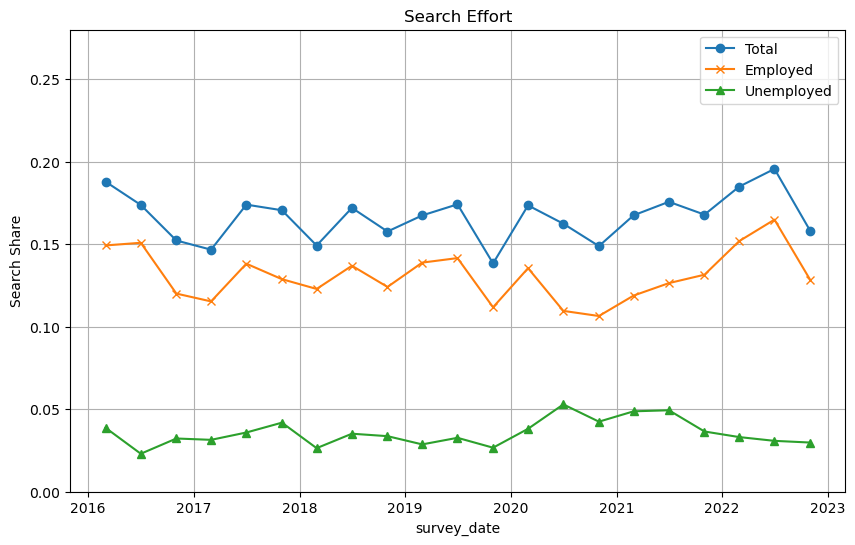

In [285]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot total search share
plt.plot(agg_data['survey_date'], agg_data['tot_search_share'], marker='o', label='Total')

# Plot employed search share
plt.plot(agg_data['survey_date'], agg_data['emp_search_share'], marker='x', label='Employed')

# Plot unemployed search share (added marker for clarity)
plt.plot(agg_data['survey_date'], agg_data['unemp_search_share'], marker='^', label='Unemployed')

# Add titles and labels
plt.title('Search Effort')
plt.xlabel('survey_date')
plt.ylabel('Search Share')
plt.ylim(0,.28)
plt.legend()
plt.grid()

# Show the plot
plt.show()

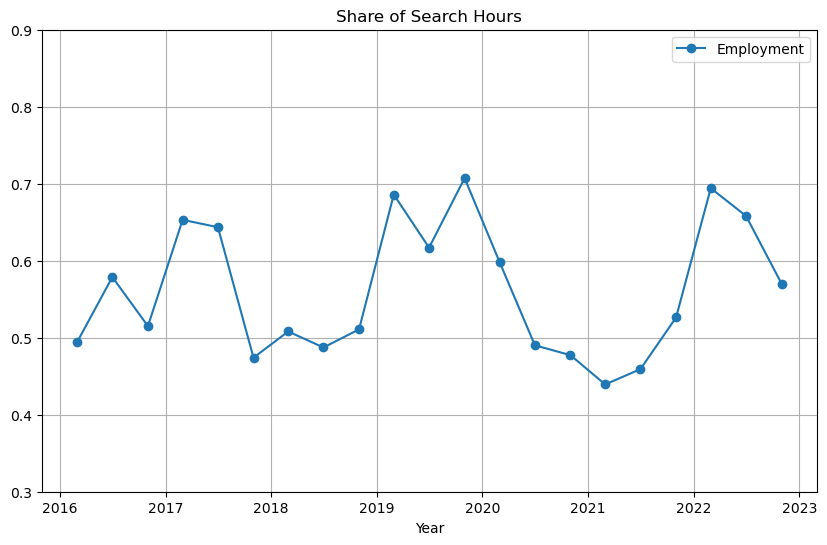

In [286]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot total search share
plt.plot(agg_data['survey_date'], agg_data['emp_share_search_hours'], marker='o', label='Employment')

# Add titles and labels
plt.title('Share of Search Hours')
plt.xlabel('Year')
plt.legend()
plt.ylim(.3,.9)
plt.grid()

# Show the plot
plt.show()

In [287]:
plot_data = data[data['search_status'] == 1]
plot_data = plot_data[plot_data['search_length'] < 200] 

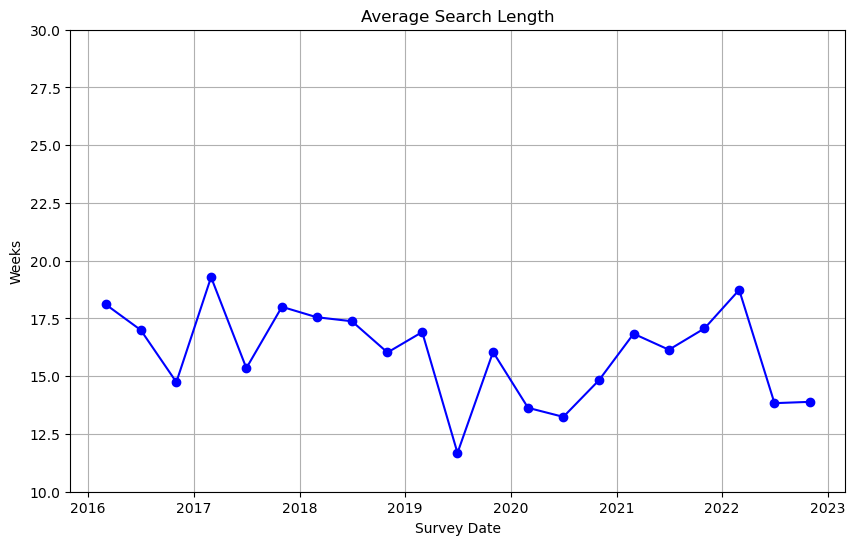

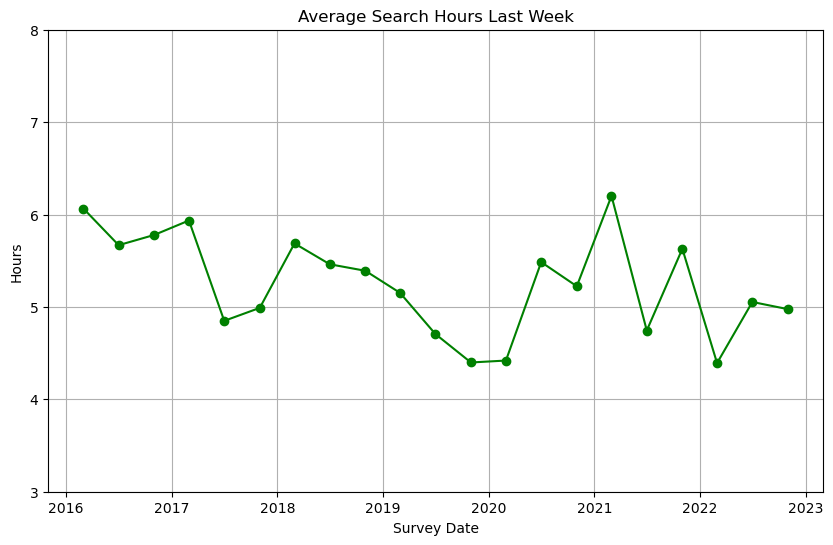

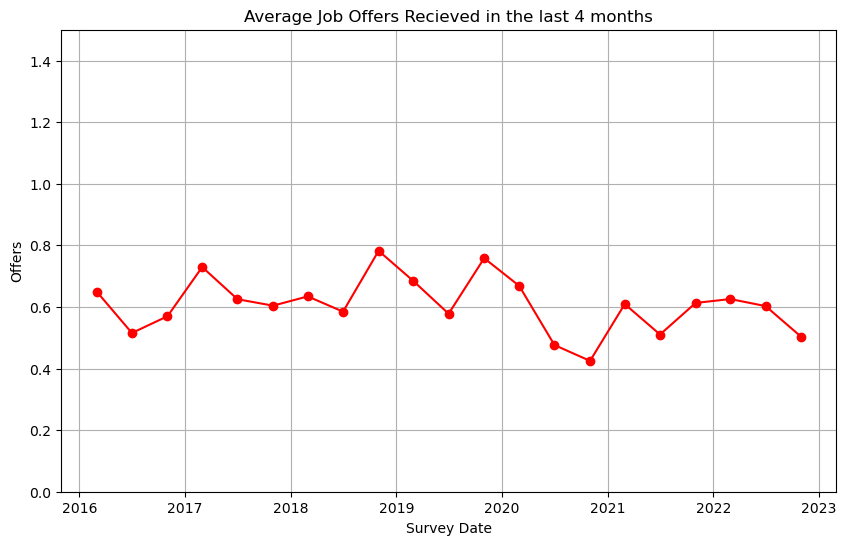

In [288]:
# Step 1: Calculate the average search_length and search_hours by survey_date
avg_search_length = plot_data.groupby('survey_date')['search_length'].mean()
avg_search_hours = plot_data.groupby('survey_date')['hours_search'].mean()
avg_job_offers = plot_data.groupby('survey_date')['job_offers_rec'].mean()

# Step 2: Create the plots

# Plot 1: Average Search Length
plt.figure(figsize=(10, 6))
plt.plot(avg_search_length.index, avg_search_length.values, marker='o', linestyle='-', color='blue')
plt.title('Average Search Length')
plt.xlabel('Survey Date')
plt.ylabel('Weeks')
plt.grid(True)
plt.ylim(10, 30)
plt.show()

# Plot 2: Average Search Hours
plt.figure(figsize=(10, 6))
plt.plot(avg_search_hours.index, avg_search_hours.values, marker='o', linestyle='-', color='green')
plt.title('Average Search Hours Last Week')
plt.xlabel('Survey Date')
plt.ylabel('Hours')
plt.grid(True)
plt.ylim(3, 8)
plt.show()

# Plot 3: Average Job Offers recieved 
plt.figure(figsize=(10, 6))
plt.plot(avg_job_offers.index, avg_job_offers.values, marker='o', linestyle='-', color='red')
plt.title('Average Job Offers Recieved in the last 4 months')
plt.xlabel('Survey Date')
plt.ylabel("Offers")
plt.grid(True)
plt.ylim(0,1.5)
plt.show()

In [289]:
avg_job_offers_emp = emp_workers.groupby('survey_date')['job_offers_rec'].mean()
avg_job_offers_unemp = unemp_workers.groupby('survey_date')['job_offers_rec'].mean()


avg_search_length_emp = emp_workers.groupby('survey_date')['search_length'].mean()
avg_search_length_unemp = unemp_workers.groupby('survey_date')['search_length'].mean()

In [292]:
avg_job_offers_emp

survey_date
2016-03-01    0.559748
2016-07-01    0.541176
2016-11-01    0.617647
2017-03-01    0.733333
2017-07-01    0.631250
2017-11-01    0.472973
2018-03-01    0.625000
2018-07-01    0.590909
2018-11-01    0.801418
2019-03-01    0.694268
2019-07-01    0.555556
2019-11-01    0.747967
2020-03-01    0.600000
2020-07-01    0.522124
2020-11-01    0.490909
2021-03-01    0.666667
2021-07-01    0.446043
2021-11-01    0.428571
2022-03-01    0.568047
2022-07-01    0.586387
2022-11-01    0.455224
Name: job_offers_rec, dtype: float64

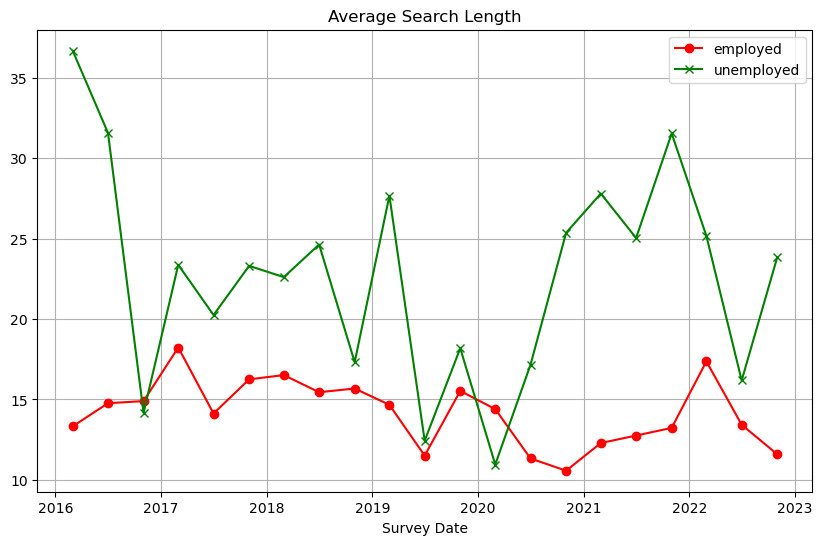

In [290]:
plt.figure(figsize=(10, 6))

# Plot average job offers for employed workers
plt.plot(avg_search_length_emp.index, avg_search_length_emp.values, marker='o', linestyle='-', color='red', label='employed')

# Plot average job offers for unemployed workers
plt.plot(avg_search_length_unemp.index, avg_search_length_unemp.values, marker='x', linestyle='-', color='green', label='unemployed')

# Add titles and labels
plt.title('Average Search Length')
plt.xlabel('Survey Date')
plt.legend()
plt.grid()
# Show the plot
plt.show()

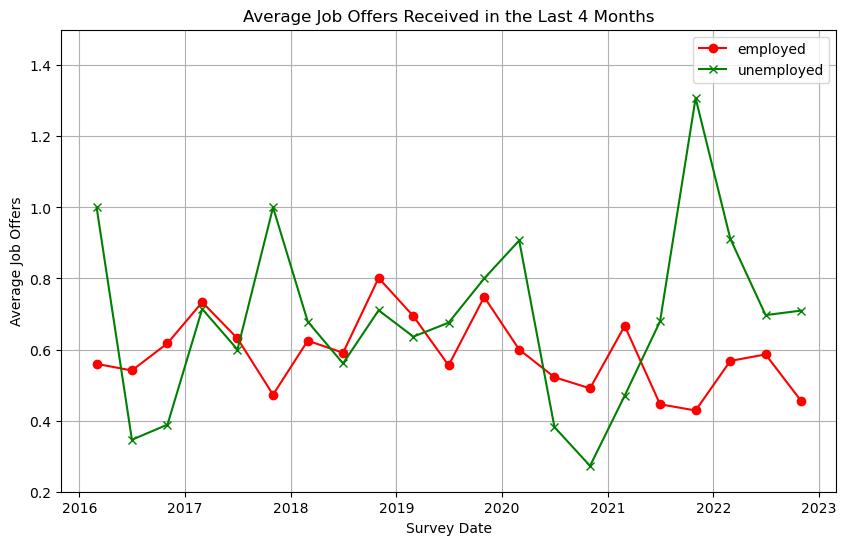

In [291]:
plt.figure(figsize=(10, 6))

# Plot average job offers for employed workers
plt.plot(avg_job_offers_emp.index, avg_job_offers_emp.values, marker='o', linestyle='-', color='red', label='employed')

# Plot average job offers for unemployed workers
plt.plot(avg_job_offers_unemp.index, avg_job_offers_unemp.values, marker='x', linestyle='-', color='green', label='unemployed')

# Add titles and labels
plt.title('Average Job Offers Received in the Last 4 Months')
plt.xlabel('Survey Date')
plt.ylabel('Average Job Offers')
plt.legend()
plt.grid()
plt.ylim(.2, 1.5)
# Show the plot
plt.show()
